In [2]:
import pandas as pd
import scanpy.external as sce
import numpy as np
import scanpy as sc
import anndata as ad

In [3]:
import pytometry as pm
import scipy.stats as stats

In [4]:
adata = ad.read_h5ad('adjTMA_xbounds.h5ad')

In [5]:
metabolic= ['G6PD',  'pNRF2', 'ATPA5', 'GLUT1', 'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA', 'CPT1A']

In [5]:
adata.X

array([[-1.57946115, -0.24979598, -0.40941962, ..., -1.47837658,
         3.43342448, -1.95208793],
       [-1.43220891, -0.15778989, -0.31790926, ..., -1.06471974,
         3.53686943, -1.18356318],
       [-1.76682372, -0.31675338, -0.49083141, ...,  0.06386558,
         3.00939604,  0.11050825],
       ...,
       [-0.73271536, -0.2633303 , -0.53963152, ..., -2.34806874,
         3.85764395, -2.63945599],
       [-1.72688125, -0.44859773, -0.79484588, ...,  0.67238823,
         1.50528676,  0.51759828],
       [-1.82029316,  0.29660559, -0.01155981, ..., -1.70792222,
        -3.51198199, -1.09941204]])

In [6]:
adata = adata[:,adata.var_names.isin(metabolic)].copy()
adata.var_names

Index(['G6PD', 'pNRF2', 'ATPA5', 'GLUT1', 'Hexokinase1', 'ASCT2',
       'CITRATE SYNTHASE', 'SDHA', 'CPT1A'],
      dtype='object')

In [5]:
import seaborn as sns

In [6]:
adata = ad.read_h5ad('adjTMA_metabolicGMM.h5ad')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
adata.var_names

Index(['DAPI', 'CD45RO', 'HLA-A', 'CD4', 'E-cadherin', 'CD20', 'CD68', 'CD8',
       'cd14', 'CD11c', 'CD44', 'Vimentin', 'CD45', 'Granzyme B', 'CD34',
       'CD3e', 'LAG3', 'CD31', 'PD-L1', 'ICOS(CD278)', 'NAKATPASE', 'FOXP3',
       'CD19', 'CD163', 'PAX5', 'G6PD', 'PD-1', 'CD21', 'SMA', 'CD11B', 'CD57',
       'HLA-DR', 'pNRF2', 'LDHA', 'ATPA5', 'Collagen IV', 'GLUT1',
       'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA', 'IDH2', 'Ki67',
       'Pan-Cytokeratin', 'CPT1A', 'nsize', 'nsolidity', 'ndiameter'],
      dtype='object')

In [9]:
adata.X

array([[-1.30880203, -0.35781454, -0.51348294, ...,  3.00679688,
         0.86243318,  3.07754522],
       [-1.54113633, -0.56216099, -0.27679843, ...,  1.23335261,
         2.30797475,  1.11942476],
       [-0.83165828, -0.49726925,  0.20488906, ...,  3.1663941 ,
         2.26919545,  2.52560905],
       ...,
       [-0.73271536, -0.2633303 , -0.53963152, ..., -2.34806874,
         3.85764395, -2.63945599],
       [-1.72688125, -0.44859773, -0.79484588, ...,  0.67238823,
         1.50528676,  0.51759828],
       [-1.82029316,  0.29660559, -0.01155981, ..., -1.70792222,
        -3.51198199, -1.09941204]])

# Function GMM

In [6]:
func = ['PD-L1', 
'PD-1', 'HLA-DR', 'HLA-A', 'ICOS(CD278)', 'Granzyme B', 'PAX5', 'FOXP3', 'Ki67']

In [13]:
adata = adata[:,adata.var_names.isin(func)].copy()
adata.var_names

Index(['HLA-A', 'Granzyme B', 'PD-L1', 'ICOS(CD278)', 'FOXP3', 'PAX5', 'PD-1',
       'HLA-DR', 'Ki67'],
      dtype='object')

In [9]:
import seaborn as sns

In [22]:
adata.X

array([[-0.40941962,  0.94832327,  0.57891613, ...,  0.9482798 ,
         0.50450871,  0.36454919],
       [-0.31790926,  1.04405033,  0.22084644, ...,  1.04400673,
         0.3392938 ,  0.45846324],
       [-0.49083141,  0.98985917,  0.5870011 , ...,  0.98981177,
         0.50585587,  0.35322259],
       ...,
       [-0.53963152,  1.84304836, -0.21589936, ...,  0.63374231,
        -0.32917264,  0.19413529],
       [-0.79484588,  2.19102046, -0.38915943, ...,  0.67557298,
        -0.53110836, -1.85484076],
       [-0.01155981,  2.6459005 ,  0.34950646, ...,  1.29713231,
         0.22317004, -0.9549692 ]])

<Axes: xlabel='HLA-A', ylabel='Density'>

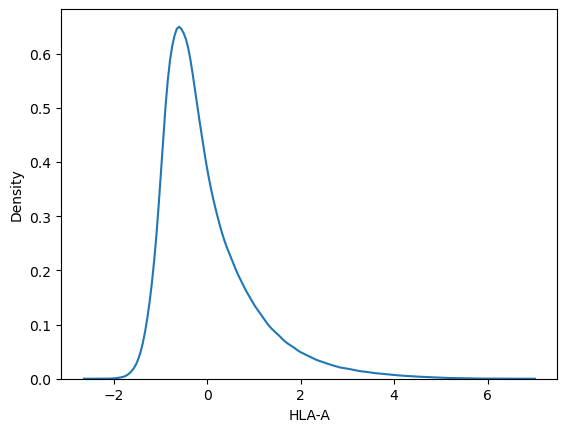

In [14]:
obs_df = sc.get.obs_df(adata, keys=adata.var_names.tolist())
sns.kdeplot(data=obs_df[adata.var_names[0]])

In [18]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 
def binary_gmm(adata, var, plot=False):  
    data = sc.get.obs_df(adata, [var])
    gmm = GaussianMixture(2)
    gmm.fit(data)
    # Get means of the components
    means = gmm.means_.flatten()
    # Sort components based on means
    order = np.argsort(means)
    # Assign labels based on the order of means
    sorted_labels = np.zeros_like(gmm.predict(data))
    sorted_labels[gmm.predict(data) == order[1]] = 1
    adata.obs[f"{var}_pos"] = sorted_labels
    data["y_pred"] = sorted_labels
    
    if plot:
        sns.kdeplot(data, x=var, color="black", cut=0)#, log_scale=10
        sns.kdeplot(data, x=var, hue="y_pred", cut=0)#, log_scale=10

In [19]:
adata.obs['CT_basetumour'] = adata.obs.CT_basetumour.astype(str)

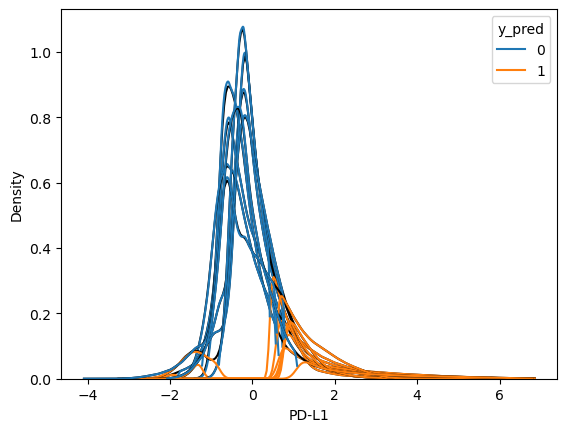

In [21]:
for v in func:
    binary_gmm(adata, v, plot=True)



In [24]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [25]:
mrkers = ['PD-L1_pos', 
'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'Granzyme B_pos', 'PAX5_pos',
          'FOXP3_pos', 'Ki67_pos']

In [26]:
adata.layers["marker_pos_mask"] = adata.obs[mrkers].values# Add as an X layer

In [21]:
'PD-L1', 
'PD-1', 'HLA-DR', 'HLA-A', 'ICOS(CD278)', 'Granzyme B', 'PAX5', 'FOXP3', 'Ki67'

In [27]:
rmap = {'PD-L1_pos': {0:'PD-L1_neg', 1:'PD-L1+'},
        'PD-1_pos': {0:'PD-1_neg', 1:'PD-1+'},
       'HLA-DR_pos': {0:'HLA-DR_neg', 1:'HLA-DR+'},
       'HLA-A_pos': {0:'HLA-A_neg', 1:'HLA-A+'},
       'ICOS(CD278)_pos': {0:'ICOS(CD278)_neg', 1:'ICOS(CD278)+'},
       'Granzyme_B_pos': {0:'Granzyme_B_neg', 1:'Granzyme_B+'},
       'PAX5_pos': {0:'PAX5_neg', 1:'PAX5+'},
       'FOXP3_pos': {0:'FOXP3_neg', 1:'FOXP3+'},
       'Ki67_pos': {0:'Ki67_neg', 1:'Ki67+'}}

In [28]:
adata.obs.replace(rmap, inplace=True)

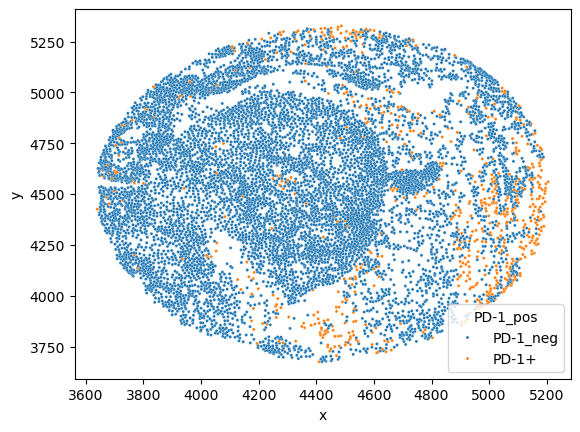

In [55]:
ax = sns.scatterplot(data =adata.obs[adata.obs['unique_core'] =='TMA_A_B2'], x = 'x', y= 'y', hue='PD-1_pos',  #palette = function_colors,
                    legend=True, s=5)

In [29]:
adata.obs

,Image,Object ID,Name,TMA core,Parent,ROI,x,y,Nucleus: Area µm^2,Nucleus: Length µm,...,Lipid_Oxidation,PPP,Glutamine_import,Phenotype,Metabolic_baseCT,CT_metatumour_funcimmu,Metabolic_allcells,meta,stage_grouped,Granzyme B_pos
43218,TMA_A,8eb9a0e4-2411-4795-ac16-f7618d6c2d75,A-1 - PathCellObject,A-1,A1,Polygon,2276.4,1257.7,18.8797,16.2778,...,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2,1
43219,TMA_A,e82556c2-c265-4e5a-8f00-c8bc6ba6984a,A-1 - PathCellObject,A-1,A1,Polygon,2254.4,1261.8,23.1361,18.8893,...,False,True,True,PPP_Glutamine_import,TumourPPP_Glutamine_import,PPP_Glutamine_import,PPP_Glutamine_import,NaN,stage2,1
43220,TMA_A,74ad0d8c-0cbb-4706-8ad8-09344d9d3587,A-1 - PathCellObject,A-1,A1,Polygon,2234.1,1265.9,39.7772,24.3426,...,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2,1
43221,TMA_A,af747316-a30d-49b3-8c95-281030cbbe87,A-1 - PathCellObject,A-1,A1,Polygon,2315.7,1273.0,67.2415,31.8443,...,False,True,False,PPP,CD4_cellsPPP,CD4_cells,PPP,NaN,stage2,1
43222,TMA_A,3634e16b-460a-41b8-8f9b-7ce175036e8b,A-1 - PathCellObject,A-1,A1,Polygon,2235.7,1276.6,64.2630,30.5931,...,False,False,False,Phenotype,TumourPhenotype,Tumour_metalow,Phenotype,low,stage2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,TMA_B,435d2fcc-1f27-42bd-bfcb-29e735d5b020,J-8 - PathCellObject,J-8,J8,Polygon,15794.7,25948.8,50.1242,30.8873,...,True,True,False,Lipid_Oxidation_PPP,FibroblastLipid_Oxidation_PPP,Fibroblast,Lipid_Oxidation_PPP,NaN,stage2,1
1282976,TMA_B,a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0,J-8 - PathCellObject,J-8,J8,Polygon,15808.1,25947.6,41.6162,24.7384,...,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2,1
1282977,TMA_B,78cdbe9b-97b3-4c79-b8dd-9a979eccd795,J-8 - PathCellObject,J-8,J8,Polygon,15816.2,25947.9,21.2559,17.8781,...,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2,1
1282978,TMA_B,c82b5693-ab8c-49be-aa92-8d6e67c96e42,J-8 - PathCellObject,J-8,J8,Polygon,15825.7,25947.6,50.0005,26.8269,...,True,True,False,Lipid_Oxidation_PPP,CD8_cellsLipid_Oxidation_PPP,CD8_cells,Lipid_Oxidation_PPP,NaN,stage2,1


In [26]:
bdata = ad.read_h5ad('adjTMA_metabolicGMM.h5ad')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [27]:
bdata.obs = adata.obs

In [28]:
bdata.write_h5ad('adjTMA_GMM_meta_func.h5ad')

In [34]:
adata.obs.reset_index()

,index,Image,Object ID,Name,Class,TMA core,Parent,ROI,x,y,...,G6PD_pos,pNRF2_pos,ATPA5_pos,GLUT1_pos,Hexokinase1_pos,ASCT2_pos,SDHA_pos,CPT1A_pos,CITRATE_SYNTHASE_pos,Metabolic_tumourGMM
0,0-0,TMA_A,9bf3cb5d-7e99-4756-88f5-7afeb0da8f3c,PathCellObject,NaN,NaN,A8,Polygon,17684.6,941.97,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,CD4_cells_G6PD+_Hexokinase1+_ASCT2+_
1,1-0,TMA_A,3742e448-afc9-4a07-af9f-520bd49a89de,PathCellObject,NaN,NaN,A8,Polygon,17570.2,952.30,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,CPT1A+,neg,Tumour_G6PD+_Hexokinase1+_ASCT2+_CPT1A+
2,2-0,TMA_A,95b9f7dc-91b1-46a5-9a5e-507f9d64b25d,PathCellObject,NaN,NaN,A8,Polygon,17663.5,950.24,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,Tumour_G6PD+_Hexokinase1+_ASCT2+_
3,3-0,TMA_A,fd5fea99-ac14-4774-a790-a1c2b8878caa,PathCellObject,NaN,NaN,A8,Polygon,17690.0,952.62,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,Other_Stromal_cells_G6PD+_Hexokinase1+_ASCT2+_
4,4-0,TMA_A,50b87348-f46c-471c-b6d5-35153d0b5869,PathCellObject,NaN,NaN,A8,Polygon,17701.9,952.87,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,Other_Stromal_cells_G6PD+_Hexokinase1+_ASCT2+_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,1282975-1,TMA_B,435d2fcc-1f27-42bd-bfcb-29e735d5b020,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15794.7,25948.80,...,G6PD+,neg,neg,neg,neg,neg,SDHA+,CPT1A+,neg,Fibroblast_G6PD+_SDHA+_CPT1A+
1282976,1282976-1,TMA_B,a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15808.1,25947.60,...,G6PD+,neg,neg,neg,neg,neg,neg,neg,neg,Tumour_G6PD+_
1282977,1282977-1,TMA_B,78cdbe9b-97b3-4c79-b8dd-9a979eccd795,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15816.2,25947.90,...,G6PD+,neg,neg,neg,Hexokinase1+,neg,neg,neg,neg,Tumour_G6PD+_Hexokinase1+_
1282978,1282978-1,TMA_B,c82b5693-ab8c-49be-aa92-8d6e67c96e42,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15825.7,25947.60,...,G6PD+,neg,neg,neg,neg,neg,neg,CPT1A+,neg,CD8_cells_G6PD+_CPT1A+


In [25]:
adata.obs = adata.obs.drop(['CITRATE SYNTHASE_pos'], axis = 1)

In [26]:
phenocols = ['_pos']
adata.obs = adata.obs.astype(
    dict.fromkeys(adata.obs.columns[adata.obs.columns.str.contains('|'.join(phenocols))], 'string'))

In [27]:
adata.obs['Metabolic_tumourGMM'] = adata.obs[['CT_basetumour', 'G6PD_pos', 'pNRF2_pos', 'ATPA5_pos', 'GLUT1_pos', 'Hexokinase1_pos',
       'ASCT2_pos', 'CITRATE_SYNTHASE_pos', 'SDHA_pos', 'CPT1A_pos']].fillna('').agg('_'.join, axis=1)

In [28]:
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('__','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('___','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('_____','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('______','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('_______','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('________','')
adata.obs['Metabolic_tumourGMM'].value_counts()

Metabolic_tumourGMM
Tumour_neg_neg_ATPA5+_neg_neg_neg_CITRATE_SYNTHASE+_SDHA+_neg            35688
Tumour_G6PD+_neg_neg_neg_neg_neg_neg_neg_neg                             23216
Tumour_neg_pNRF2+_neg_neg_neg_neg_neg_SDHA+_neg                          17196
Tumour_neg_neg_neg_GLUT1+_neg_ASCT2+_neg_neg_neg                         15490
Tumour_G6PD+_neg_neg_GLUT1+_Hexokinase1+_ASCT2+_neg_neg_neg              14810
                                                                         ...  
CD4_TFH_neg_pNRF2+_ATPA5+_GLUT1+_neg_ASCT2+_neg_neg_CPT1A+                   1
Cytotoxic_CD8_cells_G6PD+_pNRF2+_neg_neg_neg_ASCT2+_neg_neg_CPT1A+           1
CD8_cells_G6PD+_neg_neg_GLUT1+_neg_ASCT2+_CITRATE_SYNTHASE+_SDHA+_neg        1
CD4_cells_G6PD+_pNRF2+_ATPA5+_neg_Hexokinase1+_ASCT2+_neg_SDHA+_neg          1
PD1+_CD8_cells_G6PD+_pNRF2+_ATPA5+_neg_neg_ASCT2+_neg_neg_neg                1
Name: count, Length: 4798, dtype: int64

# Metabolic GMM

<Axes: xlabel='G6PD', ylabel='Density'>

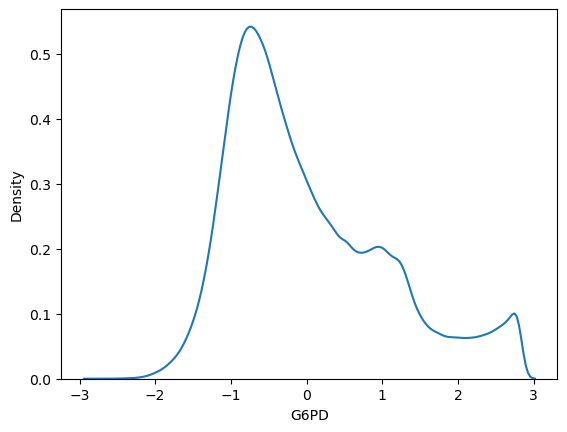

In [17]:
obs_df = sc.get.obs_df(adata, keys=adata.var_names.tolist())
sns.kdeplot(data=obs_df[adata.var_names[0]])

In [18]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 
def binary_gmm(adata, var, plot=False):  
    data = sc.get.obs_df(adata, [var])
    gmm = GaussianMixture(2)
    gmm.fit(data)
    # Get means of the components
    means = gmm.means_.flatten()
    # Sort components based on means
    order = np.argsort(means)
    # Assign labels based on the order of means
    sorted_labels = np.zeros_like(gmm.predict(data))
    sorted_labels[gmm.predict(data) == order[1]] = 1
    adata.obs[f"{var}_pos"] = sorted_labels
    data["y_pred"] = sorted_labels
    
    if plot:
        sns.kdeplot(data, x=var, color="black", cut=0)#, log_scale=10
        sns.kdeplot(data, x=var, hue="y_pred", cut=0)#, log_scale=10

In [ ]:
'G6PD',  'pNRF2', 'ATPA5', 'GLUT1', 'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA', 'CPT1A'

In [19]:
adata.obs['CT_basetumour'] = adata.obs.CT_basetumour.astype(str)

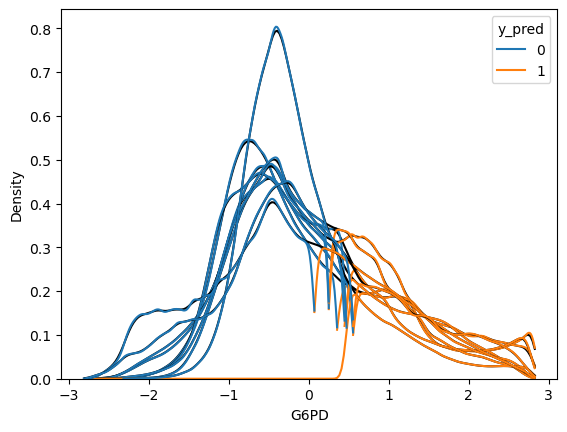

In [20]:
for v in metabolic:
    binary_gmm(adata, v, plot=True)
adata.layers["marker_pos_mask"] = adata.obs.filter(regex=r"_pos$") # Add as an X layer

In [21]:
adata.obs['CITRATE_SYNTHASE_pos']= adata.obs['CITRATE SYNTHASE_pos']

In [22]:
rmap = {'G6PD_pos': {'0':'neg', '1':'G6PD+'},
        'pNRF2_pos': {'0':'neg','1':'pNRF2+'},
        'ATPA5_pos':{'0':'neg', '1':'ATPA5+'},
        'GLUT1_pos': {'0':'neg', '1':'GLUT1+'},
        'Hexokinase1_pos': {'0':'neg', '1':'Hexokinase1+'},
        'ASCT2_pos': {'0':'neg', '1':'ASCT2+'},
        'CITRATE_SYNTHASE_pos': {'0':'neg', '1':'CITRATE_SYNTHASE+'},
        'SDHA_pos': {'0':'neg', '1':'SDHA+'},
        'CPT1A_pos': {'0':'neg', '1':'CPT1A+'}}

In [23]:
adata.obs['G6PD_pos'] = adata.obs.G6PD_pos.astype(str)
adata.obs['pNRF2_pos'] = adata.obs.pNRF2_pos.astype(str)
adata.obs['ATPA5_pos'] = adata.obs.ATPA5_pos.astype(str)
adata.obs['GLUT1_pos'] = adata.obs.GLUT1_pos.astype(str)
adata.obs['Hexokinase1_pos'] = adata.obs.Hexokinase1_pos.astype(str)
adata.obs['ASCT2_pos'] = adata.obs.ASCT2_pos.astype(str)
adata.obs['CITRATE_SYNTHASE_pos'] = adata.obs['CITRATE SYNTHASE_pos'].astype(str)
adata.obs['SDHA_pos'] = adata.obs.SDHA_pos.astype(str)
adata.obs['CPT1A_pos'] = adata.obs.CPT1A_pos.astype(str)

In [24]:
adata.obs.replace(rmap, inplace=True)

In [34]:
adata.obs.reset_index()

,index,Image,Object ID,Name,Class,TMA core,Parent,ROI,x,y,...,G6PD_pos,pNRF2_pos,ATPA5_pos,GLUT1_pos,Hexokinase1_pos,ASCT2_pos,SDHA_pos,CPT1A_pos,CITRATE_SYNTHASE_pos,Metabolic_tumourGMM
0,0-0,TMA_A,9bf3cb5d-7e99-4756-88f5-7afeb0da8f3c,PathCellObject,NaN,NaN,A8,Polygon,17684.6,941.97,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,CD4_cells_G6PD+_Hexokinase1+_ASCT2+_
1,1-0,TMA_A,3742e448-afc9-4a07-af9f-520bd49a89de,PathCellObject,NaN,NaN,A8,Polygon,17570.2,952.30,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,CPT1A+,neg,Tumour_G6PD+_Hexokinase1+_ASCT2+_CPT1A+
2,2-0,TMA_A,95b9f7dc-91b1-46a5-9a5e-507f9d64b25d,PathCellObject,NaN,NaN,A8,Polygon,17663.5,950.24,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,Tumour_G6PD+_Hexokinase1+_ASCT2+_
3,3-0,TMA_A,fd5fea99-ac14-4774-a790-a1c2b8878caa,PathCellObject,NaN,NaN,A8,Polygon,17690.0,952.62,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,Other_Stromal_cells_G6PD+_Hexokinase1+_ASCT2+_
4,4-0,TMA_A,50b87348-f46c-471c-b6d5-35153d0b5869,PathCellObject,NaN,NaN,A8,Polygon,17701.9,952.87,...,G6PD+,neg,neg,neg,Hexokinase1+,ASCT2+,neg,neg,neg,Other_Stromal_cells_G6PD+_Hexokinase1+_ASCT2+_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,1282975-1,TMA_B,435d2fcc-1f27-42bd-bfcb-29e735d5b020,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15794.7,25948.80,...,G6PD+,neg,neg,neg,neg,neg,SDHA+,CPT1A+,neg,Fibroblast_G6PD+_SDHA+_CPT1A+
1282976,1282976-1,TMA_B,a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15808.1,25947.60,...,G6PD+,neg,neg,neg,neg,neg,neg,neg,neg,Tumour_G6PD+_
1282977,1282977-1,TMA_B,78cdbe9b-97b3-4c79-b8dd-9a979eccd795,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15816.2,25947.90,...,G6PD+,neg,neg,neg,Hexokinase1+,neg,neg,neg,neg,Tumour_G6PD+_Hexokinase1+_
1282978,1282978-1,TMA_B,c82b5693-ab8c-49be-aa92-8d6e67c96e42,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15825.7,25947.60,...,G6PD+,neg,neg,neg,neg,neg,neg,CPT1A+,neg,CD8_cells_G6PD+_CPT1A+


In [25]:
adata.obs = adata.obs.drop(['CITRATE SYNTHASE_pos'], axis = 1)

In [26]:
phenocols = ['_pos']
adata.obs = adata.obs.astype(
    dict.fromkeys(adata.obs.columns[adata.obs.columns.str.contains('|'.join(phenocols))], 'string'))

In [27]:
adata.obs['Metabolic_tumourGMM'] = adata.obs[['CT_basetumour', 'G6PD_pos', 'pNRF2_pos', 'ATPA5_pos', 'GLUT1_pos', 'Hexokinase1_pos',
       'ASCT2_pos', 'CITRATE_SYNTHASE_pos', 'SDHA_pos', 'CPT1A_pos']].fillna('').agg('_'.join, axis=1)

In [28]:
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('__','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('___','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('_____','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('______','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('_______','')
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('________','')
adata.obs['Metabolic_tumourGMM'].value_counts()

Metabolic_tumourGMM
Tumour_neg_neg_ATPA5+_neg_neg_neg_CITRATE_SYNTHASE+_SDHA+_neg            35688
Tumour_G6PD+_neg_neg_neg_neg_neg_neg_neg_neg                             23216
Tumour_neg_pNRF2+_neg_neg_neg_neg_neg_SDHA+_neg                          17196
Tumour_neg_neg_neg_GLUT1+_neg_ASCT2+_neg_neg_neg                         15490
Tumour_G6PD+_neg_neg_GLUT1+_Hexokinase1+_ASCT2+_neg_neg_neg              14810
                                                                         ...  
CD4_TFH_neg_pNRF2+_ATPA5+_GLUT1+_neg_ASCT2+_neg_neg_CPT1A+                   1
Cytotoxic_CD8_cells_G6PD+_pNRF2+_neg_neg_neg_ASCT2+_neg_neg_CPT1A+           1
CD8_cells_G6PD+_neg_neg_GLUT1+_neg_ASCT2+_CITRATE_SYNTHASE+_SDHA+_neg        1
CD4_cells_G6PD+_pNRF2+_ATPA5+_neg_Hexokinase1+_ASCT2+_neg_SDHA+_neg          1
PD1+_CD8_cells_G6PD+_pNRF2+_ATPA5+_neg_neg_ASCT2+_neg_neg_neg                1
Name: count, Length: 4798, dtype: int64

In [29]:
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('neg_','')

In [30]:
adata.obs['Metabolic_tumourGMM']= adata.obs['Metabolic_tumourGMM'].str.replace('neg','')

In [31]:
adata.obs['Metabolic_tumourGMM'].value_counts()

Metabolic_tumourGMM
Tumour_ATPA5+_CITRATE_SYNTHASE+_SDHA+_                      35688
Tumour_G6PD+_                                               23216
Tumour_pNRF2+_SDHA+_                                        17196
Tumour_GLUT1+_ASCT2+_                                       15490
Tumour_G6PD+_GLUT1+_Hexokinase1+_ASCT2+_                    14810
                                                            ...  
CD4_TFH_pNRF2+_ATPA5+_GLUT1+_ASCT2+_CPT1A+                      1
Cytotoxic_CD8_cells_G6PD+_pNRF2+_ASCT2+_CPT1A+                  1
CD8_cells_G6PD+_GLUT1+_ASCT2+_CITRATE_SYNTHASE+_SDHA+_          1
CD4_cells_G6PD+_pNRF2+_ATPA5+_Hexokinase1+_ASCT2+_SDHA+_        1
PD1+_CD8_cells_G6PD+_pNRF2+_ATPA5+_ASCT2+_                      1
Name: count, Length: 4798, dtype: int64

In [36]:
adata.obs.to_csv('metabolic_GMM.csv')

In [37]:
sc.pl.matrixplot(adata, var_names= metabolic, groupby='Metabolic_tumourGMM', dendrogram=False,
                 use_raw=False, cmap="coolwarm", standard_scale='var', vmin = 0.1,
                 swap_axes= True,
                 title = 'Metabolic_tumourGMM', return_fig=True).add_totals()#.savefig('Tumour_functional.svg')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/scanpy/plotting/_baseplot_class.py:155: UserWarning: Over 500 categories found. Plot would be very large.
  warn(


In [ ]:
value_counts = adata.obs['Metabolic_tumourGMM'].value_counts()

# Filter the columns where the count is greater than 50
filtered_columns = value_counts[value_counts > 100]

# Print the filtered columns
print(filtered_columns)

# Neighbourhoods 

In [5]:
adata = ad.read_h5ad('adjTMA_metabolicGMM.h5ad')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [29]:
adata = adata[adata.obs['CT_basetumour']=='Tumour']

In [31]:
adata.obs['renamed_conditions'].value_counts()

renamed_conditions
                                                               93174
Oxidative stress resistance                                    62539
Nucleotide                                                     61288
Glucose                                                        50900
Glycolysis_Nucleotide_Glutamine                                46736
Glycolysis_Glutamine                                           36298
Glycolysis                                                     33248
Glutamine                                                      31365
Glycolysis_Nucleotide                                          24515
Glutamine_Oxidative stress resistance                          19302
Nucleotide_Glutamine                                           17156
Glucose_Oxidative stress resistance                            14292
Nucleotide_Oxidative stress resistance                         13352
Glucose_Glutamine                                              11544
Glycolysis_Oxid

In [69]:
adata = ad.read_h5ad('adjTMA_metabolicGMM.h5ad')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [71]:
adata.obs.to_csv('metabolic_immune.csv')

In [47]:
cells.columns

Index(['Unnamed: 0', 'Image', 'Object ID', 'Name', 'Class', 'TMA core',
       'Parent', 'ROI', 'x', 'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm',
       'Nucleus: Circularity', 'Nucleus: Solidity', 'tumour_nontumour',
       'immunecelltypes', 'CD4_type', 'CD8_type', 'mac_type', 'Tumour_type',
       'Tumour_type_tidy', 'tumour_metatypes', 'unique_core', 'patientID',
       'adjtma_PCF_repA', 'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM',
       'stage', 'PathwayCode', 'Histology', 'Sex', 'Smoking', 'EndCycle',
       'DOB', 'Date of surgery', 'StartDate', 'Deceased', 'DateDeceased',
       'Relapse', 'Date of relapse', 'Molecular profile', 'Mutation',
       'Last known contact', 'Surv_status', 'Surv_Followup', 'Relapse_status',
       'Relapse_followup', 'tregion', 'tumourdist', 'Tumour_area', 'Tumour_pc',
       'Stroma_area', 'Stroma_pc', 'CT_final', 'CT_basetumour',
       'CT_metatumour', 'base_celltypes', 'renamed_conditions',
       'CT_immune_metabolic', 'batch', 'glucos

# Renaming the conditions 


In [18]:
def rename_conditions(condition_string):
    # Keywords for different conditions
    glucose_keywords = ['SDHA+', 'CITRATE_SYNTHASE+', 'ATPA5+']
    glycolysis_keywords = ['GLUT1+', 'Hexokinase1+']
    nucleotide_keywords = ['G6PD+']
    fatty_acid_keywords = ['CPT1A+']
    glutamine_keywords = ['ASCT2+']
    oxidative_stress_keywords = ['pNRF2+']
    
    conditions = set(condition_string.split('_'))
    
    # Condition flags
    glucose_found = any(keyword in conditions for keyword in glucose_keywords)
    glycolysis_found = any(keyword in conditions for keyword in glycolysis_keywords)
    nucleotide_found = 'G6PD+' in conditions
    fatty_acid_found = 'CPT1A+' in conditions
    glutamine_found = 'ASCT2+' in conditions
    oxidative_stress_found = 'pNRF2+' in conditions
    
    result = []
    
    # Handle Glucose condition
    glucose_only = any(keyword in conditions for keyword in ['SDHA+', 'CITRATE_SYNTHASE+', 'ATPA5+'])
    if glucose_only and len(conditions) == 1:
        result.append('Glucose')
    elif glucose_found and (any(k in conditions for k in ['GLUT1+', 'Hexokinase1+'])):
        result.append('Glucose')
    
    # Handle Glycolysis/Warburg condition (only if GLUT1 or Hexokinase1 are present, but no other glucose terms)
    if glycolysis_found and not any(k in conditions for k in ['SDHA+', 'CITRATE_SYNTHASE+', 'ATPA5+']):
        result.append('Glycolysis')
    
    # Handle Nucleotide condition
    if nucleotide_found:
        result.append('Nucleotide')
    
    # Handle Fatty Acid condition
    if fatty_acid_found:
        result.append('Fatty_acid')
    
    # Handle Glutamine condition
    if glutamine_found:
        result.append('Glutamine')
    
    # Handle Oxidative Stress Resistance condition
    if oxidative_stress_found:
        result.append('Oxidative_stress_resistance')
    
    # Join all the matched conditions into a single string
    return '_'.join(result)




In [87]:
df = df.drop(['glucose_pos', 'glucose_neg', 'glycolysis_pos',
       'glycolysis_neg', 'nucleotide_pos', 'nucleotide_neg', 'fatty_acid_pos',
       'fatty_acid_neg', 'glutamine_pos', 'glutamine_neg',
       'oxidative_stress_resistance_pos', 'oxidative_stress_resistance_neg'], axis = 1)

In [88]:
def add_condition_flags(row):
    # Initialize the condition column names
    condition_columns = ['Glucose', 'Glycolysis', 'Nucleotide', 'Fatty_acid', 'Glutamine', 'Oxidative_stress_resistance']
    
    # Loop through condition columns and set 'pos' or 'neg' in the appropriate column
    for condition in condition_columns:
        if condition in row['renamed_conditions']:
            row[condition.lower().replace(" ", "_")] = f'{condition.lower().replace(" ", "_")}_pos'
        else:
            row[condition.lower().replace(" ", "_")] = f'{condition.lower().replace(" ", "_")}_neg'
    
    return row

# Apply the function to the dataframe to create the new columns
df = df.apply(add_condition_flags, axis=1)

# Display the modified dataframe with the new condition columns
print(df)


        Unnamed: 0  Image                             Object ID  \
0              0-0  TMA_A  9bf3cb5d-7e99-4756-88f5-7afeb0da8f3c   
1              1-0  TMA_A  3742e448-afc9-4a07-af9f-520bd49a89de   
2              2-0  TMA_A  95b9f7dc-91b1-46a5-9a5e-507f9d64b25d   
3              3-0  TMA_A  fd5fea99-ac14-4774-a790-a1c2b8878caa   
4              4-0  TMA_A  50b87348-f46c-471c-b6d5-35153d0b5869   
...            ...    ...                                   ...   
1282975  1282975-1  TMA_B  435d2fcc-1f27-42bd-bfcb-29e735d5b020   
1282976  1282976-1  TMA_B  a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0   
1282977  1282977-1  TMA_B  78cdbe9b-97b3-4c79-b8dd-9a979eccd795   
1282978  1282978-1  TMA_B  c82b5693-ab8c-49be-aa92-8d6e67c96e42   
1282979  1282979-1  TMA_B  23978b24-d624-421d-be5d-7bd1ce3ff485   

                         Name  Class TMA core Parent      ROI        x  \
0              PathCellObject    NaN      NaN     A8  Polygon  17684.6   
1              PathCellObject    NaN      NaN  

In [89]:
df.to_csv('metabolic_clustered.csv')

In [90]:
df.columns

Index(['Unnamed: 0', 'Image', 'Object ID', 'Name', 'Class', 'TMA core',
       'Parent', 'ROI', 'x', 'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm',
       'Nucleus: Circularity', 'Nucleus: Solidity', 'tumour_nontumour',
       'immunecelltypes', 'CD4_type', 'CD8_type', 'mac_type', 'Tumour_type',
       'Tumour_type_tidy', 'tumour_metatypes', 'unique_core', 'patientID',
       'adjtma_PCF_repA', 'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM',
       'stage', 'PathwayCode', 'Histology', 'Sex', 'Smoking', 'EndCycle',
       'DOB', 'Date of surgery', 'StartDate', 'Deceased', 'DateDeceased',
       'Relapse', 'Date of relapse', 'Molecular profile', 'Mutation',
       'Last known contact', 'Surv_status', 'Surv_Followup', 'Relapse_status',
       'Relapse_followup', 'tregion', 'tumourdist', 'Tumour_area', 'Tumour_pc',
       'Stroma_area', 'Stroma_pc', 'CT_final', 'CT_basetumour',
       'CT_metatumour', 'base_celltypes', 'batch', 'G6PD_pos', 'pNRF2_pos',
       'ATPA5_pos', 'GLUT1_pos', '

In [91]:
df2 = df[['Object ID', 'glucose', 'glycolysis', 'nucleotide',
       'fatty_acid', 'glutamine', 'oxidative_stress_resistance']]

In [69]:
adata= sc.read_h5ad('adjtma_scimap_spatial_analysis.h5ad')

In [92]:
adata.obs = pd.merge(adata.obs, df2, on='Object ID', how ='left')

In [94]:
adata.write_h5ad('adjTMA_metabolicGMM.h5ad')

In [45]:
df['renamed_conditions'] = df['Metabolic_tumourGMM'].apply(rename_conditions)

# Display the modified dataframe
print(df)

        Unnamed: 0  Image                             Object ID  \
0              0-0  TMA_A  9bf3cb5d-7e99-4756-88f5-7afeb0da8f3c   
1              1-0  TMA_A  3742e448-afc9-4a07-af9f-520bd49a89de   
2              2-0  TMA_A  95b9f7dc-91b1-46a5-9a5e-507f9d64b25d   
3              3-0  TMA_A  fd5fea99-ac14-4774-a790-a1c2b8878caa   
4              4-0  TMA_A  50b87348-f46c-471c-b6d5-35153d0b5869   
...            ...    ...                                   ...   
1282975  1282975-1  TMA_B  435d2fcc-1f27-42bd-bfcb-29e735d5b020   
1282976  1282976-1  TMA_B  a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0   
1282977  1282977-1  TMA_B  78cdbe9b-97b3-4c79-b8dd-9a979eccd795   
1282978  1282978-1  TMA_B  c82b5693-ab8c-49be-aa92-8d6e67c96e42   
1282979  1282979-1  TMA_B  23978b24-d624-421d-be5d-7bd1ce3ff485   

                         Name  Class TMA core Parent      ROI        x  \
0              PathCellObject    NaN      NaN     A8  Polygon  17684.6   
1              PathCellObject    NaN      NaN  

In [78]:
len(set(df['renamed_conditions']))

24

In [1]:
import anndata as ad 
import pandas as pd

In [62]:
adata = ad.read_h5ad('adjTMA_celltypes.h5ad')

In [80]:
metabolic_counts.to_csv('metabolic_counts.csv')

In [83]:
(adata.var_names)

Index(['DAPI', 'CD45RO', 'HLA-A', 'CD4', 'E-cadherin', 'CD20', 'CD68', 'CD8',
       'cd14', 'CD11c', 'CD44', 'Vimentin', 'CD45', 'Granzyme B', 'CD34',
       'CD3e', 'LAG3', 'CD31', 'PD-L1', 'ICOS(CD278)', 'NAKATPASE', 'FOXP3',
       'CD19', 'CD163', 'PAX5', 'G6PD', 'PD-1', 'CD21', 'SMA', 'CD11B', 'CD57',
       'HLA-DR', 'pNRF2', 'LDHA', 'ATPA5', 'Collagen IV', 'GLUT1',
       'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA', 'IDH2', 'Ki67',
       'Pan-Cytokeratin', 'CPT1A', 'nsize', 'nsolidity', 'ndiameter'],
      dtype='object')

In [63]:
adata.obs = adata.obs.drop(['glucose',
       'glycolysis', 'nucleotide', 'fatty_acid', 'glutamine',
       'oxidative_stress_resistance', 'renamed_conditions', 'CT_immune_metabolic','CT_metatumour'], axis =1)

In [60]:
gmm['metabolic_state']= gmm['renamed_conditions']

In [64]:
df2 = gmm[['Object ID','G6PD_pos', 'pNRF2_pos',
       'ATPA5_pos', 'GLUT1_pos', 'Hexokinase1_pos', 'ASCT2_pos', 'SDHA_pos',
       'CPT1A_pos', 'CITRATE_SYNTHASE_pos', 'metabolic_state', 'glucose', 'glycolysis', 'nucleotide',
       'fatty_acid', 'glutamine', 'oxidative_stress_resistance']]

In [65]:
adata.obs = pd.merge(adata.obs, df2, on='Object ID', how ='left')

In [67]:
adata.obs['CT_metabolic'] = adata.obs['CT_basetumour'].astype(str) + adata.obs['metabolic_state'].astype('str')

In [69]:
adata.write_h5ad('adj_TMA_celltypes.h5ad')

In [16]:
gmm= pd.read_csv('metabolic_GMM.csv')

/tmp/ipykernel_14826/2329649492.py:1: DtypeWarning: Columns (5,39,41,42,43,48) have mixed types. Specify dtype option on import or set low_memory=False.
  gmm= pd.read_csv('metabolic_GMM.csv')


In [32]:
gmm['renamed_conditions'] = gmm['Metabolic_tumourGMM'].apply(rename_conditions)

In [33]:
gmm.renamed_conditions.value_counts()

renamed_conditions
Glucose                                                                   109055
                                                                          101311
Glycolysis_Nucleotide_Glutamine                                            99255
Oxidative_stress_resistance                                                82754
Fatty_acid                                                                 73808
Nucleotide                                                                 64136
Glycolysis_Glutamine                                                       54277
Glycolysis                                                                 45599
Fatty_acid_Oxidative_stress_resistance                                     45296
Glucose_Fatty_acid                                                         45288
Glutamine                                                                  44937
Glucose_Oxidative_stress_resistance                                        36590
Glutamine

In [27]:
gmm.renamed_conditions.value_counts()

renamed_conditions
Glucose                                                                   109055
                                                                          101311
Glycolysis_Nucleotide_Glutamine                                            99255
Oxidative_stress_resistance                                                82754
Fatty_acid                                                                 73808
Nucleotide                                                                 64136
Glycolysis_Glutamine                                                       54277
Glycolysis                                                                 45599
Fatty_acid_Oxidative_stress_resistance                                     45296
Glucose_Fatty_acid                                                         45288
Glutamine                                                                  44937
Glucose_Oxidative_stress_resistance                                        36590
Glutamine

In [24]:
gmm.fatty_acid.value_counts()

fatty_acid
fatty_acid_neg    913548
fatty_acid_pos    369432
Name: count, dtype: int64

In [22]:
def add_condition_flags(row):
    # Initialize the condition column names
    condition_columns = ['Glucose', 'Glycolysis', 'Nucleotide', 'Fatty_acid', 'Glutamine', 'Oxidative_stress_resistance']
    
    # Loop through condition columns and set 'pos' or 'neg' in the appropriate column
    for condition in condition_columns:
        if condition in row['renamed_conditions']:
            row[condition.lower().replace(" ", "_")] = f'{condition.lower().replace(" ", "_")}_pos'
        else:
            row[condition.lower().replace(" ", "_")] = f'{condition.lower().replace(" ", "_")}_neg'
    
    return row

# Apply the function to the dataframe to create the new columns
gmm = gmm.apply(add_condition_flags, axis=1)

# Display the modified dataframe with the new condition columns
print(gmm)

        Unnamed: 0  Image                             Object ID  \
0              0-0  TMA_A  9bf3cb5d-7e99-4756-88f5-7afeb0da8f3c   
1              1-0  TMA_A  3742e448-afc9-4a07-af9f-520bd49a89de   
2              2-0  TMA_A  95b9f7dc-91b1-46a5-9a5e-507f9d64b25d   
3              3-0  TMA_A  fd5fea99-ac14-4774-a790-a1c2b8878caa   
4              4-0  TMA_A  50b87348-f46c-471c-b6d5-35153d0b5869   
...            ...    ...                                   ...   
1282975  1282975-1  TMA_B  435d2fcc-1f27-42bd-bfcb-29e735d5b020   
1282976  1282976-1  TMA_B  a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0   
1282977  1282977-1  TMA_B  78cdbe9b-97b3-4c79-b8dd-9a979eccd795   
1282978  1282978-1  TMA_B  c82b5693-ab8c-49be-aa92-8d6e67c96e42   
1282979  1282979-1  TMA_B  23978b24-d624-421d-be5d-7bd1ce3ff485   

                         Name  Class TMA core Parent      ROI        x  \
0              PathCellObject    NaN      NaN     A8  Polygon  17684.6   
1              PathCellObject    NaN      NaN  

In [92]:
adata.obs = pd.merge(adata.obs, df2, on='Object ID', how ='left')

In [35]:
gmm['renamed_conditions'].value_counts()

renamed_conditions
Glucose                                                                   109055
                                                                          101311
Glycolysis_Nucleotide_Glutamine                                            99255
Oxidative_stress_resistance                                                82754
Fatty_acid                                                                 73808
Nucleotide                                                                 64136
Glycolysis_Glutamine                                                       54277
Glycolysis                                                                 45599
Fatty_acid_Oxidative_stress_resistance                                     45296
Glucose_Fatty_acid                                                         45288
Glutamine                                                                  44937
Glucose_Oxidative_stress_resistance                                        36590
Glutamine

In [39]:
adata.obs = pd.merge(adata.obs, gmm, on='Object ID', how ='left')

In [43]:
adata.obs = gmm

In [89]:
adata = ad.read_h5ad('adjTMA_metabolicnbs.h5ad')

In [134]:
import pandas as pd

#cols: G6PD_pos', 'pNRF2_pos', 'ATPA5_pos',
#       'GLUT1_pos', 'Hexokinase1_pos', 'ASCT2_pos', 'SDHA_pos', 'CPT1A_pos',
#       'CITRATE_SYNTHASE_pos'

def detect_pathways(row):
    return {
        'Hypoxic': (
            row.get('GLUT1_pos') == 'GLUT1+' and
            row.get('Hexokinase1_pos') == 'Hexokinase1+' and
            row.get('CITRATE_SYNTHASE_pos') == 'neg' and
            row.get('ATPA5_pos') == 'neg' and
            row.get('SDHA_pos') == 'neg'
        ),
        'OxPhos': (
            row.get('CITRATE_SYNTHASE_pos') == 'CITRATE_SYNTHASE+' and
            row.get('ATPA5_pos') == 'ATPA5+' and
            row.get('SDHA_pos') == 'SDHA+'
        ),
        'OxPhos': (
            row.get('CITRATE_SYNTHASE_pos') == 'CITRATE_SYNTHASE+' and
            row.get('ASCT2_pos') == 'ASCT2+' and
            row.get('SDHA_pos') == 'SDHA+'
        ),
        'Mitochondrial': (
            row.get('CITRATE_SYNTHASE_pos') == 'CITRATE_SYNTHASE+' and
            row.get('ATPA5_pos') == 'ATPA5+' and
            row.get('SDHA_pos') == 'SDHA+' and
            row.get('CPT1A_pos') == 'CPT1A+' and
            row.get('ASCT2_pos') == 'ASCT2+'
        ),
        'Oxidative_Stress': (
            row.get('pNRF2_pos') == 'pNRF2+' and
            row.get('SDHA_pos') == 'neg' and
            row.get('CPT1A_pos') == 'CPT1A+'
        ),
        'Lipid_Oxidation': (
            row.get('CPT1A_pos') == 'CPT1A+'
        ), 
        'PPP':(
            row.get('G6PD_pos') =='G6PD+'
        ),
        'Glutamine_import':(
            row.get('ASCT2_pos') == 'ASCT2+' and 
            row.get('CITRATE_SYNTHASE_pos') == 'neg' and 
            row.get('SDHA_pos') == 'neg'

        )
    }

# Apply the function to each row and convert to a DataFrame
pathway_df = adata.obs.apply(detect_pathways, axis=1, result_type='expand')

pathway_df['Phenotype'] = pathway_df[pathway_df.columns].apply(
    lambda row: '_'.join([col for col in row.index if row[col]]), axis=1
)
pathway_df

,Hypoxic,OxPhos,Mitochondrial,Oxidative_Stress,Lipid_Oxidation,PPP,Glutamine_import,Phenotype
0,False,False,False,False,False,True,True,PPP_Glutamine_import
1,False,False,False,False,True,True,True,Lipid_Oxidation_PPP_Glutamine_import
2,False,False,False,False,False,True,True,PPP_Glutamine_import
3,False,False,False,False,False,True,True,PPP_Glutamine_import
4,False,False,False,False,False,True,True,PPP_Glutamine_import
...,...,...,...,...,...,...,...,...
1282975,False,False,False,False,True,True,False,Lipid_Oxidation_PPP
1282976,False,False,False,False,False,True,False,PPP
1282977,False,False,False,False,False,True,False,PPP
1282978,False,False,False,False,True,True,False,Lipid_Oxidation_PPP


In [96]:
# Create a combined column with all positive pathway names



In [135]:
pathway_df.Phenotype.value_counts()

Phenotype
                                                                 448474
Lipid_Oxidation                                                  191091
PPP                                                              150991
PPP_Glutamine_import                                             100788
Glutamine_import                                                  79948
Lipid_Oxidation_PPP                                               45927
Hypoxic_PPP_Glutamine_import                                      41148
Hypoxic_Glutamine_import                                          34122
Oxidative_Stress_Lipid_Oxidation                                  33686
Lipid_Oxidation_PPP_Glutamine_import                              28883
Hypoxic                                                           24289
Lipid_Oxidation_Glutamine_import                                  22280
OxPhos                                                            20881
Oxidative_Stress_Lipid_Oxidation_Glutamine_import     

In [139]:
def simplify_phenotype(row):
    active = [col for col in row.index if row[col]]
    
    # If both are present, remove 'OxPhos Metabolism'
    if 'OxPhos' in active and 'Mitochondrial' in active:
        active.remove('OxPhos')

    if 'Lipid' in active and 'Mitochondrial' in active: 
        active.remove('Lipid_Oxidation')

    if 'Lipid_Oxidation' in active and 'Oxidative_Stress' in active: 
        active.remove('Lipid_Oxidation')
        
    return '_'.join(active) if active else 'None'

pathway_df['Phenotype'] = pathway_df[pathway_df.columns].apply(simplify_phenotype, axis=1)


In [142]:
pathway_df.Phenotype.value_counts()

Phenotype
Phenotype                                        448474
Lipid_Oxidation                                  191091
PPP                                              150991
PPP_Glutamine_import                             100788
Glutamine_import                                  79948
Lipid_Oxidation_PPP                               45927
Hypoxic_PPP_Glutamine_import                      41148
Hypoxic_Glutamine_import                          34122
Oxidative_Stress                                  33686
Lipid_Oxidation_PPP_Glutamine_import              28883
Hypoxic                                           24289
Lipid_Oxidation_Glutamine_import                  22280
OxPhos                                            20881
Oxidative_Stress_Glutamine_import                 16692
Hypoxic_PPP                                       11688
Oxidative_Stress_PPP                               8511
Oxidative_Stress_PPP_Glutamine_import              5369
Hypoxic_Lipid_Oxidation_PPP_Glutamine_

In [141]:
pathway_df['Phenotype'] = pathway_df['Phenotype'].apply(
    lambda x: ', '.join([p.replace('_Phenotype', '') for p in x.split(', ')])
)


In [148]:
# Merge the result into the original dataframe
adata.obs = pd.concat([adata.obs, pathway_df], axis=1)

In [129]:
metabolic = ['G6PD', 
     'pNRF2',  'ATPA5',  'GLUT1',
       'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA',  'Ki67',
       'Pan-Cytokeratin', 'CPT1A']

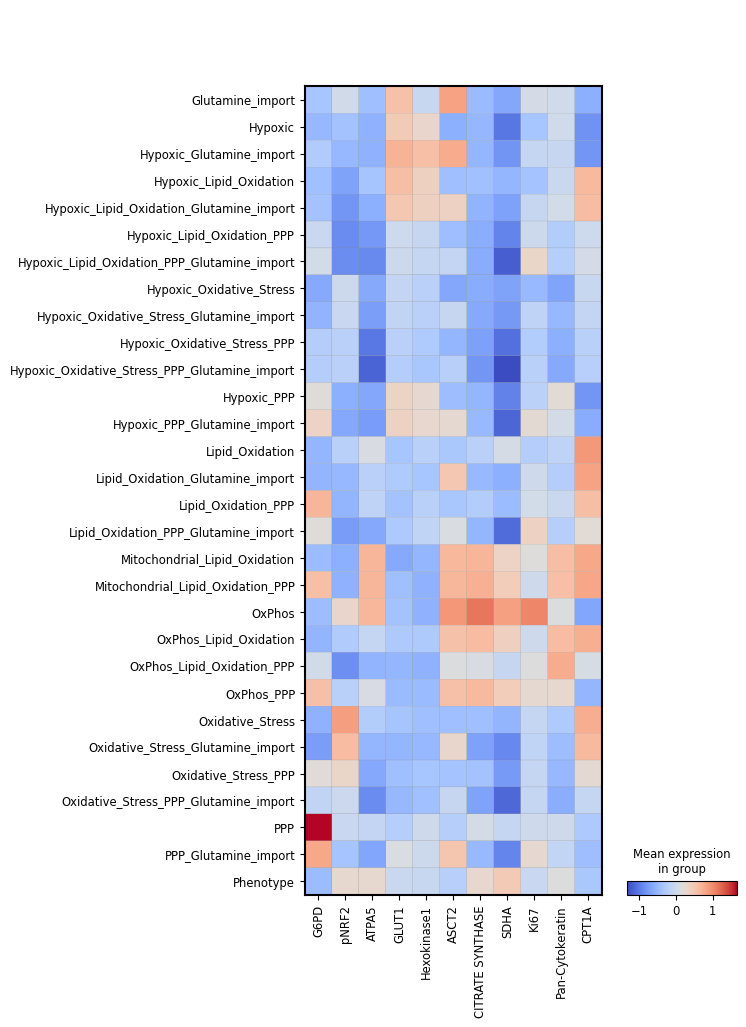

In [167]:
sc.pl.matrixplot(adata, var_names = metabolic, groupby = 'Phenotype', cmap = 'coolwarm')#, vmin= 0, vmax = 1)

In [154]:
adata.obs.base_celltypes.value_counts()

base_celltypes
Tumour                 554813
Macrophages            173955
Other_Stromal_cells    143977
CD4_cells              112022
Fibroblast             111716
CD8_cells               78729
Vessels                 75611
B_cells                 32157
Name: count, dtype: int64

In [156]:
adata.obs['Metabolic_baseCT'] = adata.obs['base_celltypes'].astype('str') +  adata.obs['Phenotype'].astype('str')

In [157]:
adata.obs.Metabolic_baseCT.value_counts()

Metabolic_baseCT
TumourPhenotype                          225614
TumourPPP                                 92199
MacrophagesPhenotype                      54433
TumourLipid_Oxidation                     54146
MacrophagesLipid_Oxidation                41922
                                          ...  
B_cellsOxPhos_Lipid_Oxidation                 2
MacrophagesOxPhos_Lipid_Oxidation_PPP         2
B_cellsMitochondrial_Lipid_Oxidation          2
B_cellsOxPhos_Lipid_Oxidation_PPP             1
CD8_cellsOxPhos_Lipid_Oxidation_PPP           1
Name: count, Length: 231, dtype: int64

In [159]:
tumour = adata.obs[adata.obs["Metabolic_baseCT"].str.contains("Tumour")]
tumour.Metabolic_baseCT.value_counts()

Metabolic_baseCT
TumourPhenotype                                        225614
TumourPPP                                               92199
TumourLipid_Oxidation                                   54146
TumourPPP_Glutamine_import                              38620
TumourGlutamine_import                                  33230
TumourLipid_Oxidation_PPP                               19933
TumourOxPhos                                            18276
TumourHypoxic_PPP_Glutamine_import                      15013
TumourHypoxic_Glutamine_import                          12502
TumourOxidative_Stress                                   9539
TumourLipid_Oxidation_PPP_Glutamine_import               8523
TumourHypoxic                                            7298
TumourLipid_Oxidation_Glutamine_import                   6307
TumourHypoxic_PPP                                        3790
TumourOxidative_Stress_Glutamine_import                  2974
TumourOxidative_Stress_PPP                           

In [160]:
macrophage = adata.obs[adata.obs["Metabolic_baseCT"].str.contains("Macrophage")]
macrophage.Metabolic_baseCT.value_counts()

Metabolic_baseCT
MacrophagesPhenotype                                        54433
MacrophagesLipid_Oxidation                                  41922
MacrophagesPPP                                              21079
MacrophagesPPP_Glutamine_import                             12123
MacrophagesLipid_Oxidation_PPP                               7867
MacrophagesGlutamine_import                                  6517
MacrophagesOxidative_Stress                                  6040
MacrophagesLipid_Oxidation_Glutamine_import                  3905
MacrophagesLipid_Oxidation_PPP_Glutamine_import              3312
MacrophagesHypoxic_PPP_Glutamine_import                      3141
MacrophagesHypoxic_Glutamine_import                          2565
MacrophagesHypoxic                                           2212
MacrophagesOxidative_Stress_Glutamine_import                 1598
MacrophagesHypoxic_PPP                                       1424
MacrophagesOxidative_Stress_PPP                            

In [161]:
proportion_df = pd.crosstab(index=adata.obs['base_celltypes'],
                                    columns=adata.obs['Phenotype'],
                                    normalize="index")

In [165]:
import matplotlib.pyplot as plt

<Figure size 3600x900 with 0 Axes>

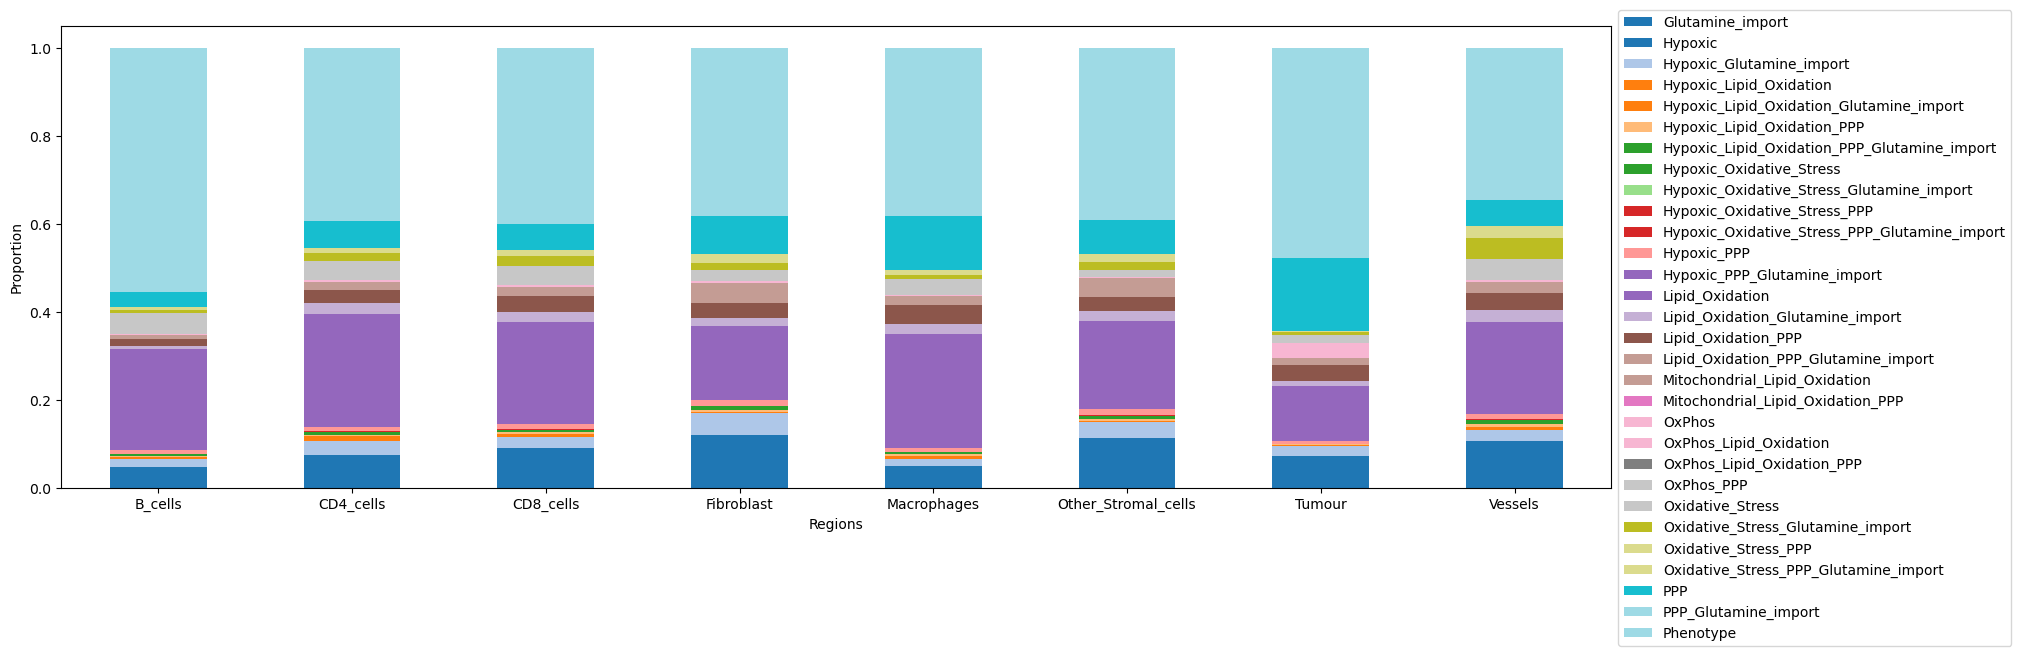

In [166]:
plt.figure(figsize=(12, 3), dpi = 300)

proportion_df.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

In [168]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'Class', 'TMA core', 'Parent', 'ROI', 'x',
       'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'tumour_metatypes', 'unique_core', 'patientID', 'adjtma_PCF_repA',
       'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode',
       'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery',
       'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos',
       'Granzyme B_

In [169]:
import numpy as np

adata.obs['CT_metatumour_funcimmu'] = np.where(adata.obs['base_celltypes'].str.contains('Tumour', case=False, na=False),
                            adata.obs['Phenotype'],  # if 'tumour' is in histology
                            adata.obs['CT_final'])  # if not

adata.obs['CT_metatumour_funcimmu'].value_counts()

CT_metatumour_funcimmu
Phenotype                                        225614
Other_Stromal_cells                              143977
Macrophages                                      115350
Fibroblast                                       111716
CD4_cells                                        106029
PPP                                               92199
Vessels                                           75611
CD8_cells                                         69537
Lipid_Oxidation                                   54146
PPP_Glutamine_import                              38620
Macrophages_M2                                    36381
Glutamine_import                                  33230
B_cells                                           32157
Lipid_Oxidation_PPP                               19933
OxPhos                                            18276
Hypoxic_PPP_Glutamine_import                      15013
Hypoxic_Glutamine_import                          12502
Macrophages_PDL1+        

In [170]:
adata.obs['CT_metatumour_funcimmu'] = adata.obs['CT_metatumour_funcimmu'].apply(
    lambda x: ', '.join([p.replace('Phenotype', 'Tumour_metalow') for p in x.split(', ')])
)

adata.obs['CT_metatumour_funcimmu'].value_counts()

CT_metatumour_funcimmu
Tumour_metalow                                   225614
Other_Stromal_cells                              143977
Macrophages                                      115350
Fibroblast                                       111716
CD4_cells                                        106029
PPP                                               92199
Vessels                                           75611
CD8_cells                                         69537
Lipid_Oxidation                                   54146
PPP_Glutamine_import                              38620
Macrophages_M2                                    36381
Glutamine_import                                  33230
B_cells                                           32157
Lipid_Oxidation_PPP                               19933
OxPhos                                            18276
Hypoxic_PPP_Glutamine_import                      15013
Hypoxic_Glutamine_import                          12502
Macrophages_PDL1+        

In [176]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'Class', 'TMA core', 'Parent', 'ROI', 'x',
       'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'tumour_metatypes', 'unique_core', 'patientID', 'adjtma_PCF_repA',
       'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode',
       'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery',
       'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       

In [175]:
adata.obs = adata.obs.drop(['CT_metatumour_immunebroad', 'metabolic_state','CT_metabolic','glucose', 'glycolysis',
       'nucleotide', 'fatty_acid', 'glutamine', 'oxidative_stress_resistance', 'Granzyme B_pos'], axis =1)

In [194]:
adata.obs['Metabolic_allcells'] = adata.obs['Phenotype']

In [232]:
adata.obs['meta'].value_counts()

meta
low    448474
Name: count, dtype: int64

In [200]:
adata.obs = adata.obs.drop(['Class','tumour_metatypes'], axis =1)

In [231]:
adata.obs['meta'] = adata.obs['Metabolic_allcells'].apply(
    lambda x: ', '.join([p.replace('Phenotype', 'Tumour_metalow') for p in x.split(', ')])
)
#adata.obs['meta'] = adata.obs['Metabolic_allcells'].map(meta_mapping)

In [229]:
adata = ad.read_h5ad('adjTMA_cleaned.h5ad')

In [202]:
adata.write_h5ad('adjTMA_cleaned.h5ad')

In [203]:
adata.obs["stage"].value_counts()

stage
IIB     656418
IIIA    291620
IB      130017
IIA      90392
IIIB     63740
IA3      27705
1A3      23088
Name: count, dtype: int64

In [236]:
# Create your mapping dictionary
stage_mapping = {
    'IIB': 'stage2',
    'IIIA': 'stage3',
    'IB': 'stage1',
    'IIA': 'stage2',
    'IIIB': 'stage3',
    'IA3': 'stage1',
    '1A3': 'stage1'
}

# Apply it to a new column (let's say your existing column is 'stage_raw')
adata.obs['stage_grouped'] = adata.obs['stage'].map(stage_mapping)


In [237]:
adata.obs['stage_grouped'].value_counts()

stage_grouped
stage2    746810
stage3    355360
stage1    180810
Name: count, dtype: int64

In [238]:
stage = pd.crosstab(index=adata.obs['base_celltypes'],
                                    columns=[adata.obs['Metabolic_allcells'], adata.obs['stage_grouped']],
                                    normalize="index")

In [239]:
stage

Metabolic_allcells  Glutamine_import                       Hypoxic            \
stage_grouped                 stage1    stage2    stage3    stage1    stage2   
base_celltypes                                                                 
B_cells                     0.005380  0.023323  0.005255  0.001866  0.010138   
CD4_cells                   0.008427  0.035805  0.013837  0.002651  0.010748   
CD8_cells                   0.022139  0.041776  0.012130  0.001829  0.007901   
Fibroblast                  0.010634  0.041382  0.025135  0.003867  0.021402   
Macrophages                 0.008307  0.019723  0.009433  0.002305  0.006881   
Other_Stromal_cells         0.012009  0.047417  0.023323  0.003119  0.016301   
Tumour                      0.025477  0.025555  0.008862  0.002619  0.006391   
Vessels                     0.014799  0.042071  0.023594  0.001971  0.015342   

Metabolic_allcells            Hypoxic_Glutamine_import                      \
stage_grouped          stage3                   stage1    stage2    stage3   
base_celltypes                                                               
B_cells              0.002612                 0.001120  0.013776  0.001959   
CD4_cells            0.003964                 0.003312  0.021621  0.006767   
CD8_cells            0.004408                 0.007253  0.013807  0.004331   
Fibroblast           0.017410                 0.006758  0.027131  0.017276   
Macrophages          0.003530                 0.003622  0.008019  0.003104   
Other_Stromal_cells  0.011606                 0.003890  0.021448  0.011814   
Tumour               0.004144                 0.013057  0.007091  0.002386   
Vessels              0.009350                 0.002235  0.013596  0.009271   

Metabolic_allcells  Hypoxic_Lipid_Oxidation  ...  \
stage_grouped                        stage1  ...   
base_celltypes                               ...   
B_cells                            0.000124  ...   
CD4_cells                          0.000982  ...   
CD8_cells                          0.000457  ...   
Fibroblast                         0.000394  ...   
Macrophages                        0.000995  ...   
Other_Stromal_cells                0.000174  ...   
Tumour                             0.000189  ...   
Vessels                            0.000344  ...   

Metabolic_allcells  Oxidative_Stress_PPP_Glutamine_import       PPP            \
stage_grouped                                      stage3    stage1    stage2   
base_celltypes                                                                  
B_cells                                          0.000466  0.002643  0.027272   
CD4_cells                                        0.000884  0.003696  0.042518   
CD8_cells                                        0.000381  0.003874  0.043212   
Fibroblast                                       0.001378  0.003634  0.055077   
Macrophages                                      0.000466  0.006864  0.084010   
Other_Stromal_cells                              0.001757  0.004126  0.052877   
Tumour                                           0.000238  0.003846  0.098817   
Vessels                                          0.002367  0.003531  0.041251   

Metabolic_allcells            PPP_Glutamine_import                      \
stage_grouped          stage3               stage1    stage2    stage3   
base_celltypes                                                           
B_cells              0.005318             0.002830  0.013869  0.006499   
CD4_cells            0.013399             0.007972  0.028941  0.013462   
CD8_cells            0.013146             0.009133  0.031856  0.008955   
Fibroblast           0.027588             0.014770  0.075361  0.030148   
Macrophages          0.030301             0.009227  0.050249  0.010215   
Other_Stromal_cells  0.019607             0.017586  0.091758  0.037763   
Tumour               0.063517             0.009628  0.044110  0.015870   
Vessels              0.014588             0.003280  0.0

In [217]:
stage.index.name = 'base_celltypes'

In [223]:
stage

,Glutamine_import_stage1,Glutamine_import_stage2,Glutamine_import_stage3,Hypoxic_stage1,Hypoxic_stage2,Hypoxic_stage3,Hypoxic_Glutamine_import_stage1,Hypoxic_Glutamine_import_stage2,Hypoxic_Glutamine_import_stage3,Hypoxic_Lipid_Oxidation_stage1,...,Oxidative_Stress_PPP_Glutamine_import_stage3,PPP_stage1,PPP_stage2,PPP_stage3,PPP_Glutamine_import_stage1,PPP_Glutamine_import_stage2,PPP_Glutamine_import_stage3,Phenotype_stage1,Phenotype_stage2,Phenotype_stage3
base_celltypes,,,,,,,,,,,,,,,,,,,,,
B_cells,0.005380,0.023323,0.005255,0.001866,0.010138,0.002612,0.001120,0.013776,0.001959,0.000124,...,0.000466,0.002643,0.027272,0.005318,0.002830,0.013869,0.006499,0.083341,0.379948,0.067606
CD4_cells,0.008427,0.035805,0.013837,0.002651,0.010748,0.003964,0.003312,0.021621,0.006767,0.000982,...,0.000884,0.003696,0.042518,0.013399,0.007972,0.028941,0.013462,0.048839,0.227357,0.067603
CD8_cells,0.022139,0.041776,0.012130,0.001829,0.007901,0.004408,0.007253,0.013807,0.004331,0.000457,...,0.000381,0.003874,0.043212,0.013146,0.009133,0.031856,0.008955,0.085724,0.202733,0.060918
Fibroblast,0.010634,0.041382,0.025135,0.003867,0.021402,0.017410,0.006758,0.027131,0.017276,0.000394,...,0.001378,0.003634,0.055077,0.027588,0.014770,0.075361,0.030148,0.037560,0.135102,0.089728
Macrophages,0.008307,0.019723,0.009433,0.002305,0.006881,0.003530,0.003622,0.008019,0.003104,0.000995,...,0.000466,0.006864,0.084010,0.030301,0.009227,0.050249,0.010215,0.053054,0.185146,0.074715
Other_Stromal_cells,0.012009,0.047417,0.023323,0.003119,0.016301,0.011606,0.003890,0.021448,0.011814,0.000174,...,0.001757,0.004126,0.052877,0.019607,0.017586,0.091758,0.037763,0.036749,0.150545,0.056127
Tumour,0.025477,0.025555,0.008862,0.002619,0.006391,0.004144,0.013057,0.007091,0.002386,0.000189,...,0.000238,0.003846,0.098817,0.063517,0.009628,0.044110,0.015870,0.075719,0.174095,0.156835
Vessels,0.014799,0.042071,0.023594,0.001971,0.015342,0.009350,0.002235,0.013596,0.009271,0.000344,...,0.002367,0.003531,0.041251,0.014588,0.003280,0.042481,0.021783,0.052797,0.159884,0.064739


In [234]:
stage

,Glutamine_import_stage1,Glutamine_import_stage2,Glutamine_import_stage3,Hypoxic_stage1,Hypoxic_stage2,Hypoxic_stage3,Hypoxic_Glutamine_import_stage1,Hypoxic_Glutamine_import_stage2,Hypoxic_Glutamine_import_stage3,Hypoxic_Lipid_Oxidation_stage1,...,Oxidative_Stress_PPP_Glutamine_import_stage3,PPP_stage1,PPP_stage2,PPP_stage3,PPP_Glutamine_import_stage1,PPP_Glutamine_import_stage2,PPP_Glutamine_import_stage3,Phenotype_stage1,Phenotype_stage2,Phenotype_stage3
base_celltypes,,,,,,,,,,,,,,,,,,,,,
B_cells,0.005380,0.023323,0.005255,0.001866,0.010138,0.002612,0.001120,0.013776,0.001959,0.000124,...,0.000466,0.002643,0.027272,0.005318,0.002830,0.013869,0.006499,0.083341,0.379948,0.067606
CD4_cells,0.008427,0.035805,0.013837,0.002651,0.010748,0.003964,0.003312,0.021621,0.006767,0.000982,...,0.000884,0.003696,0.042518,0.013399,0.007972,0.028941,0.013462,0.048839,0.227357,0.067603
CD8_cells,0.022139,0.041776,0.012130,0.001829,0.007901,0.004408,0.007253,0.013807,0.004331,0.000457,...,0.000381,0.003874,0.043212,0.013146,0.009133,0.031856,0.008955,0.085724,0.202733,0.060918
Fibroblast,0.010634,0.041382,0.025135,0.003867,0.021402,0.017410,0.006758,0.027131,0.017276,0.000394,...,0.001378,0.003634,0.055077,0.027588,0.014770,0.075361,0.030148,0.037560,0.135102,0.089728
Macrophages,0.008307,0.019723,0.009433,0.002305,0.006881,0.003530,0.003622,0.008019,0.003104,0.000995,...,0.000466,0.006864,0.084010,0.030301,0.009227,0.050249,0.010215,0.053054,0.185146,0.074715
Other_Stromal_cells,0.012009,0.047417,0.023323,0.003119,0.016301,0.011606,0.003890,0.021448,0.011814,0.000174,...,0.001757,0.004126,0.052877,0.019607,0.017586,0.091758,0.037763,0.036749,0.150545,0.056127
Tumour,0.025477,0.025555,0.008862,0.002619,0.006391,0.004144,0.013057,0.007091,0.002386,0.000189,...,0.000238,0.003846,0.098817,0.063517,0.009628,0.044110,0.015870,0.075719,0.174095,0.156835
Vessels,0.014799,0.042071,0.023594,0.001971,0.015342,0.009350,0.002235,0.013596,0.009271,0.000344,...,0.002367,0.003531,0.041251,0.014588,0.003280,0.042481,0.021783,0.052797,0.159884,0.064739


In [240]:
# Flatten MultiIndex columns into strings (joined by "_")
stage.columns = ['{}+{}'.format(a, b) for a, b in stage.columns]

In [241]:
stage_reset = stage.reset_index()
stage_melt = stage_reset.melt(id_vars='base_celltypes', 
                              var_name='Pathway_Stage',
                              value_name='proportion')

In [245]:
stage_melt

,base_celltypes,Pathway_Stage,proportion,Metabolic_allcells,stage_grouped
0,B_cells,Glutamine_import+stage1,0.005380,Glutamine_import,stage1
1,CD4_cells,Glutamine_import+stage1,0.008427,Glutamine_import,stage1
2,CD8_cells,Glutamine_import+stage1,0.022139,Glutamine_import,stage1
3,Fibroblast,Glutamine_import+stage1,0.010634,Glutamine_import,stage1
4,Macrophages,Glutamine_import+stage1,0.008307,Glutamine_import,stage1
...,...,...,...,...,...
707,Fibroblast,Phenotype+stage3,0.089728,Phenotype,stage3
708,Macrophages,Phenotype+stage3,0.074715,Phenotype,stage3
709,Other_Stromal_cells,Phenotype+stage3,0.056127,Phenotype,stage3
710,Tumour,Phenotype+stage3,0.156835,Phenotype,stage3


In [243]:
stage_melt[['Metabolic_allcells', 'stage_grouped']] = stage_melt['Pathway_Stage'].str.split('+', expand=True)



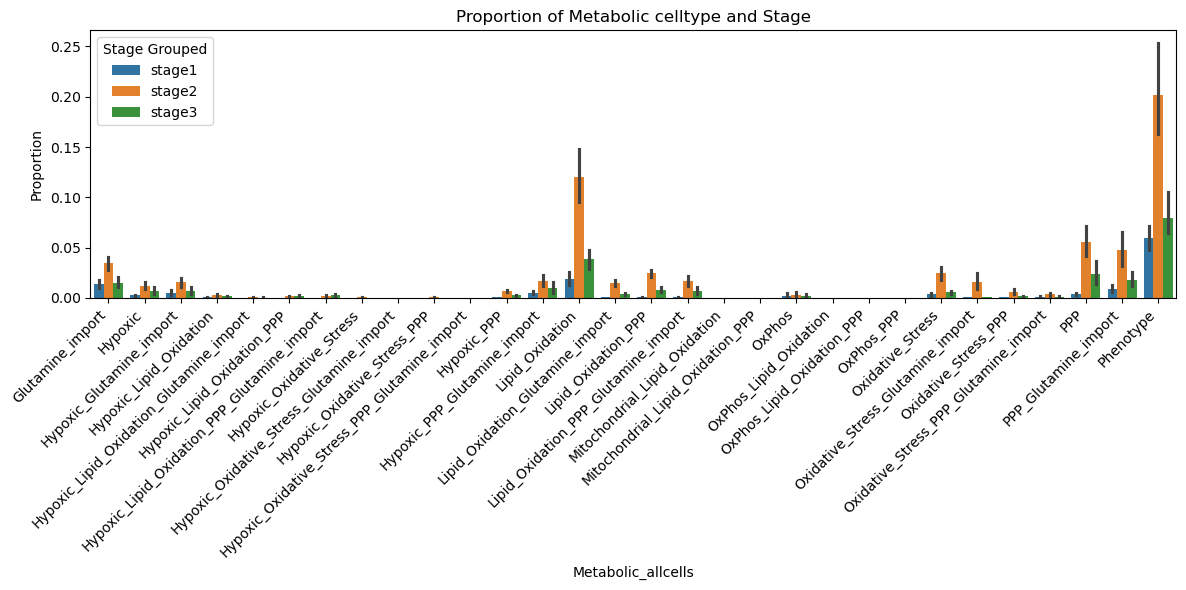

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=stage_melt, 
            x='Metabolic_allcells', 
            y='proportion', 
            hue='stage_grouped')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion')
plt.title('Proportion of Metabolic celltype and Stage')
plt.legend(title='Stage Grouped')
plt.tight_layout()
plt.show()
